# UNDERSTAND DATASET


### IMPORT TH∆Ø VI·ªÜN

In [2]:
#IMPORT TH∆Ø VI·ªÜN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pathlib import Path

### IMPORT DATASET

In [3]:
#IMPORT DATASET
# L·∫•y ƒë∆∞·ªùng d·∫´n c·ªßa th∆∞ m·ª•c notebook hi·ªán t·∫°i
BASE = Path().resolve()

# T·ª± ƒë·ªông n·ªëi t·ªõi c√°c th∆∞ m·ª•c con
master_path = BASE / "Dataset" / "MasterData"
sales_path  = BASE / "Dataset" / "Sales_snapshot_data"
inv_path    = BASE/ "Dataset" / "Inventory_snapshot_data"

#ƒê·ªçc c√°c file ch√≠nh
retail_price = pd.read_csv(master_path / "Retail_price.csv")
cogs = pd.read_csv(master_path / "COGS.csv")
channel = pd.read_csv(master_path / "Distribution Channel.csv")
calendar = pd.read_csv(master_path / "Master_Calendar.csv")
product = pd.read_csv(master_path / "Productmaster.csv")
classification = pd.read_csv(master_path / "New_Core_Classification.csv")

# C√°c file ghi nh·∫≠n b√°n h√†ng v√† t·ªìn kho (nhi·ªÅu file, ch·ªâ ƒë·ªçc 1 file m·∫´u ho·∫∑c n·ªëi t·∫•t c·∫£)
sales_files = list(sales_path.glob("*.csv"))
inventory_files = list(inv_path.glob("*.csv"))

sales_data = pd.concat([pd.read_csv(f) for f in sales_files], ignore_index=True)
inventory_data = pd.concat([pd.read_csv(f) for f in inventory_files], ignore_index=True)

## ƒê·ªåC HI·ªÇU D·ªÆ LI·ªÜU

### Dataset cho ƒë·ªÅ t√†i l√† InventoryAndSale_snapshot_data g·ªìm 3 t·∫≠p d·ªØ li·ªáu ch√≠nh:
+ Masterdata: c√°c tr∆∞·ªùng d·ªØ li·ªáu n·ªÅn v·ªÅ s·∫£n ph·∫©m, k√™nh b√°n h√†ng, chi ph√≠, v√† ph√¢n lo·∫°i... (g·ªìm 6 b·∫£ng database) c·ª• th·ªÉ:
+ Sales: Ch·ª©a th√¥ng tin b√°n h√†ng (ghi nh·∫≠n m·ªói th√°ng = 1 file v√† t·ª´ 01/2022 ƒë·∫øn 07/2023 --> 17 b·∫£ng database) --> D·ªÆ LI·ªÜU CH√çNH CHO MODEL
+ Inventory: Ghi nh·∫≠n th√¥ng tin t·ªìn kho m·ªói cu·ªëi th√°ng (1 th√°ng = 1 file --> 12 b·∫£ng cho 12 th√°ng c·ªßa 2022)

M√î T·∫¢ c√°c t·ªáp data = B·∫¢NG G·ªíM: FIELD - DATA TYPE - DESCRIPTION

D√πng c√°c l·ªánh sau ƒë·ªÉ ƒë·ªçc ƒë∆∞·ª£c:
+ Field: c√°c tr∆∞·ªùng d·ªØ li·ªáu (c·ªôt) c·ªßa m·ªói b·∫£ng
+ Datatype: ki·ªÉu d·ªØ li·ªáu c·ªßa m·ªói field
+ Non-null count: ƒê·∫øm s·ªë d√≤ng kh√¥ng c√≥ gi√° tr·ªã NaN c·ªßa m·ªói field
+ M√¥ t·∫£ s∆° l∆∞·ª£c: kh√°i qu√°t √Ω nghƒ©a c·ªßa field (c√¢u l·ªánh kh√¥ng √°p d·ª•ng cho description n√†y)

### Trong t·∫≠p d·ªØ li·ªáu MasterData, ta KH√îNG th·∫≠t s·ª± c·∫ßn 3 b·∫£ng sau, v√¨:
+ Master_calendar: ch·ª©a d·ªØ li·ªáu trong th·ªùi gian t·ª´ 2016-2020, trong khi ƒë√≥ b·∫£ng trung t√¢m "Sales" l·∫°i ghi nh·∫≠n t·ª´ 2022-2023.

+ Retail_price: ghi nh·∫≠n gi√° b√°n h√†ng c·ªßa m·ªói productID trong c√°c kho·∫£ng th·ªùi gian kh√°c nhau --> net_price trong b·∫£ng "Sales" ƒë√£ ƒë·∫°i di·ªán cho gi√° tr·ªã n√†y n√™n c√≥ th·ªÉ b·ªè qua

+ New_core_classification: ƒë·ªÉ ph√¢n lo·∫°i s·∫£n ph·∫©m d√≤ng M·ªõi hay c≈© --> d·ªØ li·ªáu kh√¥ng c·∫ßn thi·∫øt v·ªõi ƒë·ªÅ t√†i

In [4]:
#Retail_price: ghi nh·∫≠n gi√° b√°n h√†ng c·ªßa t·ª´ng productID t·∫°i t·ª´ng gia ƒëo·∫°n kh√°c nhau
print(retail_price.info())
print(retail_price.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669460 entries, 0 to 669459
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  669460 non-null  int64 
 1   index       669460 non-null  int64 
 2   amount      669460 non-null  int64 
 3   valid_from  669460 non-null  object
 4   valid_to    669460 non-null  object
 5   product_id  669460 non-null  object
dtypes: int64(3), object(3)
memory usage: 30.6+ MB
None
   Unnamed: 0  index  amount  valid_from    valid_to  \
0           0      0  125000  01.01.2024  01.12.9999   
1           1      1  125000  01.01.2024  01.12.9999   
2           2      2  125000  01.01.2024  01.12.9999   
3           3      3  125000  01.01.2024  01.12.9999   
4           4      4  125000  01.01.2024  01.12.9999   

                              product_id  
0  f64e53d83cfa461abe156559d55ccae2DEN35  
1  c50a6b0caa0b4ca9af55cf27607b64d3DEN36  
2  408592eb75e44216a1f65e831f9a08e5DEN37

In [5]:
#New_core_classification: Ph√¢n lo·∫°i s·∫£n ph·∫©m theo d√≤ng Core / New ho·∫∑c nh√≥m chi·∫øn l∆∞·ª£c s·∫£n ph·∫©m.
print(classification.info())
print(classification.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150209 entries, 0 to 150208
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          150209 non-null  int64  
 1   index               150209 non-null  int64  
 2   lauch_season        128566 non-null  object 
 3   lauch_season_num    150193 non-null  float64
 4   sales_season        150193 non-null  object 
 5   sales_season_num    150193 non-null  float64
 6   final_status        122936 non-null  object 
 7   b2c_assortment      150193 non-null  float64
 8   b2b_assortment      150193 non-null  float64
 9   total_assortment    150193 non-null  float64
 10  product_syle_color  150176 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 12.6+ MB
None
   Unnamed: 0  index lauch_season  lauch_season_num sales_season  \
0           0      0          NaN               0.0         17DE   
1           1      1          NaN  

In [6]:
#MasterCalendar: B·∫£ng quy ƒë·ªïi m√£ tu·∫ßn (YearWeek) sang c√°c th√¥ng tin th·ªùi gian nh∆∞ nƒÉm, th√°ng.
print(calendar.info())
print(calendar.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         260 non-null    int64 
 1   Month        260 non-null    int64 
 2   Month_3Char  260 non-null    int64 
 3   Week         260 non-null    int64 
 4   YearWeek     260 non-null    int64 
 5   Start Date   260 non-null    object
 6   End Date     260 non-null    object
 7   CNY          260 non-null    object
dtypes: int64(5), object(3)
memory usage: 16.4+ KB
None
   Year  Month  Month_3Char  Week  YearWeek  Start Date    End Date  CNY
0  2016      1            1     1    201601  2016-01-04  2016-01-10   No
1  2016      1            1     2    201602  2016-01-11  2016-01-17   No
2  2016      1            1     3    201603  2016-01-18  2016-01-24  Yes
3  2016      1            1     4    201604  2016-01-25  2016-01-31  Yes
4  2016      2            2     5    201605  2016-02-01  2016-02-

### 3 B·∫£ng sau c·∫ßn d√πng cho model:

In [7]:
#COGS: Gi√° v·ªën h√†ng b√°n c·ªßa t·ª´ng s·∫£n ph·∫©m. (Cost of Good Sold)
print(cogs.info())
print(cogs.head())
print("*"*100)
print("/C√°c field quan tr·ªçng c·∫ßn d√πng c·ªßa b·∫£ng 'Distribution Channel': `amount`, `product_id`")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522675 entries, 0 to 522674
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   index       522675 non-null  int64 
 1   amount      522675 non-null  int64 
 2   valid_from  522675 non-null  object
 3   valid_to    522675 non-null  object
 4   product_id  522675 non-null  object
dtypes: int64(2), object(3)
memory usage: 19.9+ MB
None
   index  amount  valid_from    valid_to  \
0      0   50000  23.12.2021  31.01.2023   
1      1   50000  23.12.2021  31.01.2023   
2      2  479400  01.01.2023  07.02.2023   
3      3  479400  01.01.2023  07.02.2023   
4      4  479400  01.01.2023  07.02.2023   

                              product_id  
0  904de55fb0ca414cb86b2e466c9d74c1OOO00  
1  904de55fb0ca414cb86b2e466c9d74c1OOO00  
2  9e8ecc5d2b104d609e3b53c4724bc96aCAM39  
3  9225ed5b408343be98a4dc63d4027a26CAM40  
4  d1410b40bb004d1f9b2c2619d2c933f6CAM41  
************************

In [8]:
#Distribution_Channel: Danh m·ª•c k√™nh ph√¢n ph·ªëi v√† th√¥ng tin c·ª≠a h√†ng (site).
print(channel.info())
print(channel.head())
print("*"*100)
print("/C√°c field quan tr·ªçng c·∫ßn d√πng c·ªßa b·∫£ng 'Distribution Channel': 'site_store', `region`, `store_type`, `urbanization`, `b2b_b2c`, `channel_id'")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3405 entries, 0 to 3404
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      3405 non-null   int64 
 1   index           3405 non-null   int64 
 2   site_store      3405 non-null   int64 
 3   b2b_b2c         3405 non-null   object
 4   channel_id      3405 non-null   object
 5   region          3405 non-null   object
 6   city_level      3405 non-null   object
 7   store_concept   3403 non-null   object
 8   trade_term      3405 non-null   object
 9   area_range      464 non-null    object
 10  store_type      3405 non-null   object
 11  urbanization    3405 non-null   object
 12  branch_area     3405 non-null   object
 13  address_2       3403 non-null   object
 14  address_3       3403 non-null   object
 15  showroom_area   470 non-null    object
 16  warehouse_area  456 non-null    object
 17  start_month     3376 non-null   object
 18  start_ye

In [9]:
#Productmaster: Danh s√°ch chi ti·∫øt t·ª´ng s·∫£n ph·∫©m (SKU) c·ªßa doanh nghi·ªáp.
print(product.info())
print(product.head())
print("*"*100)
print("/C√°c field quan tr·ªçng c·∫ßn d√πng c·ªßa b·∫£ng 'Productmaster':`product_id`, `product_group`, `brand_name`, `price_group`, `listing_price`")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94867 entries, 0 to 94866
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            94867 non-null  int64  
 1   index                 94867 non-null  int64  
 2   color                 94822 non-null  object 
 3   color_group           94867 non-null  object 
 4   listing_price         94840 non-null  float64
 5   price_group           94840 non-null  object 
 6   gender                94867 non-null  object 
 7   product_group         94867 non-null  object 
 8   detail_product_group  94867 non-null  object 
 9   shoe_product          94867 non-null  object 
 10  size_group            94867 non-null  object 
 11  size                  94722 non-null  float64
 12  age_group             94867 non-null  object 
 13  activity_group        94867 non-null  object 
 14  image_copyright       94867 non-null  object 
 15  lifestyle_group    

### V√† Kh√¥ng c·∫ßn d√πng t·∫≠p d·ªØ li·ªáu Inventory cho model v√¨:
C√°c ghi nh·∫≠n h√†ng t·ªìn kho di·ªÖn ra trong 12 th√°ng 2022 m√† b·∫£ng trung t√¢m "Sales" l·∫°i ghi nh·∫≠n t·ª´ 01/2022 ƒë·∫øn 07/2023 --> Inventory kh√¥ng ƒë√°p ƒë·ªß d·ªØ li·ªáu trong th·ªùi gian c·ªßa Sales (ƒë·ªìng th·ªùi d·ªØ li·ªáu v·ªÅ t·ªìn kho kh√¥ng th·∫≠t s·ª± c·∫ßn thi·∫øt cho ƒë·ªÅ t√†i)

In [10]:
#Inventory: Ghi nh·∫≠n th√¥ng tin t·ªìn kho m·ªói cu·ªëi th√°ng (1 th√°ng = 1 file --> 12 b·∫£ng cho 12 th√°ng c·ªßa 2022)
print(inventory_data.info())
print(inventory_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367080 entries, 0 to 1367079
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Unnamed: 0          1367080 non-null  int64 
 1   index               1367080 non-null  int64 
 2   plant               1367080 non-null  int64 
 3   calendar_year       1367080 non-null  int64 
 4   calendar_yeer_week  1367080 non-null  int64 
 5   sloc                1367080 non-null  object
 6   quantity            1367080 non-null  int64 
 7   total_amount        1367080 non-null  int64 
 8   product_id          1367080 non-null  object
dtypes: int64(7), object(2)
memory usage: 93.9+ MB
None
   Unnamed: 0  index  plant  calendar_year  calendar_yeer_week  sloc  \
0           0      0   1201           2022            20220228  3000   
1           1      1   1201           2022            20220228  3000   
2           2      2   1201           2022            20220228  30

### B·∫£ng Sales ƒë∆∞·ª£c g·ªôp t·ª´ c√°c ghi nh·∫≠n 01/2022-07/2023 l√† b·∫£ng trung t√¢m (quan tr·ªçng nh·∫•t):

In [11]:
# Sales: Ch·ª©a th√¥ng tin b√°n h√†ng (ghi nh·∫≠n m·ªói th√°ng = 1 file v√† t·ª´ 01/2022 ƒë·∫øn 07/2023 --> 17 b·∫£ng database)
#--> D·ªÆ LI·ªÜU CH√çNH CHO MODEL
print(sales_data.info())
print(sales_data.head())
print("*"*100)
print("/2 field l√† `distribution_channel` v√† `customer_id` cot h·ªÉ l∆∞·ª£t b·ªè v√¨ kh√¥ng c·∫ßn thi·∫øt cho model")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831966 entries, 0 to 831965
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   month                      831966 non-null  int64 
 1   week                       831966 non-null  int64 
 2   site                       831966 non-null  int64 
 3   branch_id                  831966 non-null  int64 
 4   channel_id                 831966 non-null  object
 5   distribution_channel       831966 non-null  object
 6   distribution_channel_code  831966 non-null  object
 7   sold_quantity              831966 non-null  int64 
 8   cost_price                 831966 non-null  int64 
 9   net_price                  831966 non-null  int64 
 10  customer_id                831965 non-null  object
 11  product_id                 831966 non-null  object
dtypes: int64(7), object(5)
memory usage: 76.2+ MB
None
     month    week  site  branch_id channel_id di

## C√ÅC TR∆Ø·ªúNG C·ªêT L√ïI C·ª¶A MODEL

| **Nh√≥m bi·∫øn**                        | **Bi·∫øn c·ª• th·ªÉ**                                                             | **Ngu·ªìn b·∫£ng**            | **Vai tr√≤ trong m√¥ h√¨nh**                                                              |
| ------------------------------------ | --------------------------------------------------------------------------- | ------------------------- | --------------------------------------------------------------------------------------------- |
| **ƒê·ªãa ƒëi·ªÉm + K√™nh b√°n (Region / Channel)**        | `region`, `store_type`, `urbanization`, `b2b_b2c`, `channel_id`                                      | `Distribution Channel`    | ƒê·∫∑c tr∆∞ng khu v·ª±c v√† m·ª©c ƒë·ªô ƒë√¥ th·ªã ho√° ‚Äì ·∫£nh h∆∞·ªüng h√†nh vi ti√™u d√πng. Ph√¢n bi·ªát h√†nh vi mua gi·ªØa B2B v√† B2C, ·∫£nh h∆∞·ªüng ƒë·ªô nh·∫°y gi√°.                         |
| **S·∫£n ph·∫©m (Product)**               | `product_id`, `product_group`, `brand_name`, `price_group`, `listing_price`| `Productmaster`           | ƒê·∫∑c tr∆∞ng s·∫£n ph·∫©m, ph√¢n lo·∫°i gi√° v√† th∆∞∆°ng hi·ªáu ‚Äì n·ªÅn t·∫£ng ch√≠nh ƒë·ªÉ d·ª± b√°o nhu c·∫ßu theo SKU. |
| **Gi√° & doanh s·ªë (Pricing & Sales)** | `sold_quantity`, `net_price`, `cost_price`,  `month`, `week`                                   | `Sales_snapshot_data`     | Th√¥ng tin b√°n h√†ng th·ª±c t·∫ø ‚Äì bi·∫øn ƒë·∫ßu v√†o ch√≠nh cho d·ª± b√°o.                                   |
| **Gi√° v·ªën chu·∫©n (Standard Cost)**    | `cost_std`                                                                  | `COGS`                    | D√πng ƒë·ªÉ ph√¢n t√≠ch ƒë·ªô l·ªách gi·ªØa gi√° v·ªën th·ª±c t·∫ø v√† gi√° v·ªën k·∫ø ho·∫°ch.                           |
| **T·ªïng h·ª£p (Derived Features)**      | `revenue`, `profit`, `gross_margin`, `discount_rate` (d·ª± t√≠nh √°p d·ª•ng)                       | T√≠nh to√°n t·ª´ c√°c bi·∫øn g·ªëc | Bi·∫øn ph·∫£n √°nh hi·ªáu qu·∫£ kinh doanh, d√πng ƒë·ªÉ ki·ªÉm ƒë·ªãnh v√† hu·∫•n luy·ªán m√¥ h√¨nh.                   |


--> V·ªõi m·ªói nh√≥m bi·∫øn (field) ta s·∫Ω ·ª©ng d·ª•ng cho t·ª´ng m·ª•c ƒë√≠ch nh·ªè trong vi·ªác x√¢y d·ª±ng m√¥ h√¨nh c·ªßa ƒë·ªÅ t√†i

==> 3 b·∫£ng thu·ªôc MasterData (COGS, ProductMasster v√† DistributionChannel) v√† b·∫£ng Sales l√† 4 b·∫£ng ch√≠nh ch√∫ng ta c·∫ßn ph√¢n t√≠ch


## ƒê·ªåC L·∫†I D·ªÆ LI·ªÜU 4 B·∫¢NG V·ªöI C√ÅC FIELD C·∫¶N THI·∫æT

In [12]:
# === ƒê·ªçc l·∫°i t·∫≠p d·ªØ li·ªáu sale v·ªõi nh·ªØng field c·∫ßn thi·∫øt ===
sales_data = sales_data[['week', 'month', 'site','branch_id', 'channel_id','distribution_channel_code', 'sold_quantity', 'net_price', 'cost_price', 'product_id']]
print("Sales:", sales_data.shape) # ==> ƒê√ÇY L√Ä B·∫¢NG TRUNG T√ÇM, lo·∫°i b·ªè 'channel_distribution' v√† 'custumer_id'


# === ƒê·ªçc Product, Channel & COGS ===
product = product[['product_id', 'product_group', 'brand_name', 'price_group', 'listing_price']]
print("products: ", product.shape)

cogs = cogs[['product_id', 'amount']]
print("cogs: ", cogs.shape)

channel = channel[['site_store', 'region', 'store_type', 'urbanization', 'b2b_b2c']]
print("channel: ", channel.shape)

Sales: (831966, 10)
products:  (94867, 5)
cogs:  (522675, 2)
channel:  (3405, 5)


In [13]:
def check_negative_ratio(df, column):
    """
    ƒê·∫øm s·ªë l∆∞·ª£ng v√† t·ª∑ l·ªá ph·∫ßn trƒÉm gi√° tr·ªã √¢m trong m·ªôt c·ªôt c·ª• th·ªÉ.
    """
    total = len(df)
    negative_count = (df[column] < 0).sum()
    ratio = (negative_count / total) * 100 if total > 0 else 0

    print(f"C·ªôt '{column}': c√≥ {negative_count} gi√° tr·ªã √¢m ({ratio:.2f}% trong t·ªïng {total} d√≤ng).")

    return negative_count, ratio

# G·ªçi h√†m cho b·∫£ng sales_data
check_negative_ratio(sales_data, 'sold_quantity')


C·ªôt 'sold_quantity': c√≥ 26432 gi√° tr·ªã √¢m (3.18% trong t·ªïng 831966 d√≤ng).


(np.int64(26432), np.float64(3.177052908412123))

### Th·ªëng k√™ m√¥ t·∫£ nhanh c√°c ƒë·∫∑c tr∆∞ng c·ªßa c√°c b·∫£ng sau

In [14]:
print("B·∫£ng Sales: ")
print(sales_data.describe(include=[float, int])) #m√¥ t·∫£ c√°c c·ªôt s·ªë numeric
print("\n \n B·∫£ng Product: ")
print(product.describe(include=[float, int])) #m√¥ t·∫£ c√°c c·ªôt s·ªë numeric
print("\n B·∫£ng COGS: ")
print(cogs.describe(include=[float, int]))#m√¥ t·∫£ c√°c c·ªôt s·ªë numeric
print("\n B·∫£ng Channel: ")
print(channel.describe(include=[float, int])) #m√¥ t·∫£ c√°c c·ªôt s·ªë numeric




B·∫£ng Sales: 
                week         month           site      branch_id  \
count  831966.000000  8.319660e+05  831966.000000  831966.000000   
mean   202252.805829  2.022310e+06    1283.890859    1265.760139   
std        43.837871  4.588165e+02     214.917423     220.033499   
min    202153.000000  2.022001e+06    1100.000000    1100.000000   
25%    202218.000000  2.022005e+06    1118.000000    1100.000000   
50%    202237.000000  2.022009e+06    1200.000000    1200.000000   
75%    202303.000000  2.023001e+06    1503.000000    1500.000000   
max    202352.000000  2.023007e+06    2001.000000    2000.000000   

       sold_quantity     net_price    cost_price  
count  831966.000000  8.319660e+05  8.319660e+05  
mean        1.411734  3.993313e+05  3.055058e+05  
std         3.262691  6.886876e+05  6.034099e+05  
min       -47.000000 -2.302845e+07 -2.184840e+07  
25%         1.000000  1.594260e+05  1.190000e+05  
50%         1.000000  2.900000e+05  2.069680e+05  
75%         1.0

## Ki·ªÉm tra ki·ªÉu d·ªØ li·ªáu v√† gi√° tr·ªã √¢m c·ªßa c√°c field

In [15]:
import numpy as np

def check_dtype_and_negative(df, name="DataFrame"):
    print(f"\nKi·ªÉm tra d·ªØ li·ªáu trong b·∫£ng: {name}")
    print("-" * 60)

    #  Ki·ªÉm tra ki·ªÉu d·ªØ li·ªáu kh√¥ng ƒë·ªìng nh·∫•t
    for col in df.columns:
        types = df[col].map(type).unique()
        if len(types) > 1:
            print(f"C·ªôt '{col}' c√≥ nhi·ªÅu ki·ªÉu d·ªØ li·ªáu: {types}")

    # Ki·ªÉm tra c·ªôt s·ªë b·ªã ƒë·ªçc sai ki·ªÉu object
    print("\n C·ªôt ki·ªÉu object nghi ng·ªù ch·ª©a gi√° tr·ªã s·ªë:")
    for col in df.columns:
        if df[col].dtype == 'object':
            # b·ªè qua chu·ªói ch·ªâ ch·ª©a k√Ω t·ª± h·ª£p l·ªá cho s·ªë
            non_numeric = df[col].astype(str).str.contains(r'[^0-9.\-]', na=False).sum()
            if non_numeric == 0 and df[col].nunique() > 5:
                print(f"  '{col}' c√≥ v·∫ª l√† s·ªë nh∆∞ng b·ªã ƒë·ªçc th√†nh object.")

    # Ki·ªÉm tra gi√° tr·ªã √¢m b·∫•t th∆∞·ªùng trong c·ªôt s·ªë
    print("\n C·ªôt c√≥ gi√° tr·ªã √¢m b·∫•t th∆∞·ªùng:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        neg_count = (df[col] < 0).sum()
        if neg_count > 0:
            min_val = df[col].min()
            print(f" {col}: {neg_count} gi√° tr·ªã √¢m (min = {min_val})")

    print("-" * 60)

check_dtype_and_negative(cogs, "COGS")
check_dtype_and_negative(product, "Product")
check_dtype_and_negative(channel, "Channel")
check_dtype_and_negative(sales_data, "Sales")



Ki·ªÉm tra d·ªØ li·ªáu trong b·∫£ng: COGS
------------------------------------------------------------

 C·ªôt ki·ªÉu object nghi ng·ªù ch·ª©a gi√° tr·ªã s·ªë:

 C·ªôt c√≥ gi√° tr·ªã √¢m b·∫•t th∆∞·ªùng:
------------------------------------------------------------

Ki·ªÉm tra d·ªØ li·ªáu trong b·∫£ng: Product
------------------------------------------------------------
C·ªôt 'price_group' c√≥ nhi·ªÅu ki·ªÉu d·ªØ li·ªáu: [<class 'str'> <class 'float'>]

 C·ªôt ki·ªÉu object nghi ng·ªù ch·ª©a gi√° tr·ªã s·ªë:

 C·ªôt c√≥ gi√° tr·ªã √¢m b·∫•t th∆∞·ªùng:
------------------------------------------------------------

Ki·ªÉm tra d·ªØ li·ªáu trong b·∫£ng: Channel
------------------------------------------------------------

 C·ªôt ki·ªÉu object nghi ng·ªù ch·ª©a gi√° tr·ªã s·ªë:

 C·ªôt c√≥ gi√° tr·ªã √¢m b·∫•t th∆∞·ªùng:
------------------------------------------------------------

Ki·ªÉm tra d·ªØ li·ªáu trong b·∫£ng: Sales
------------------------------------------------------------

 C·ªôt

### B·∫£ng Product c√≥ 'price_group' ch·ª©a 2 ki·ªÉu d·ªØ li·ªáu:
--> Ho√†n to√†n b√¨nh th∆∞·ªùng v√† h·ª£p l·ªá v√¨ n√≥ chia group theo kho·∫£ng gi√° n√™n c√≥ d·∫•u so s√°nh
--> kh√¥ng c·∫ßn ph·∫£i x·ª≠ l√Ω

### B·∫£ng Sales c√≥ gi√° tr·ªã √¢m ·ªü sold_quantity v√† c√°c c·ªôt gi√°:
--> Ta lo·∫°i b·ªè c√°c d√≤ng c√≥ 'sold_quantity' √¢m v√¨ model kh√¥ng x√©t t·ªõi c√°c tr∆∞·ªùng h·ª£p ho√†n tr·∫£ hay chi·∫øt kh·∫•u


In [16]:
print("S·ªë d√≤ng tr∆∞·ªõc khi lo·∫°i b·ªè gi√° tr·ªã √¢m: ",sales_data.shape)
# Lo·∫°i b·ªè c√°c d√≤ng c√≥ sold_quantity √¢m
sales_data = sales_data[sales_data['sold_quantity'] >= 0]

# Ki·ªÉm tra l·∫°i sau khi lo·∫°i b·ªè
print("S·ªë d√≤ng c√≤n l·∫°i:", sales_data.shape)
print("C√≤n gi√° tr·ªã √¢m kh√¥ng?", (sales_data['sold_quantity'] < 0).sum())


S·ªë d√≤ng tr∆∞·ªõc khi lo·∫°i b·ªè gi√° tr·ªã √¢m:  (831966, 10)
S·ªë d√≤ng c√≤n l·∫°i: (805534, 10)
C√≤n gi√° tr·ªã √¢m kh√¥ng? 0


# CLEAN CODE

## Ki·ªÉm tra gi√° tr·ªã thi·∫øu (Missing Values) + x·ª≠ l√≠

In [17]:
print("Ki·ªÉm tra missing value c·ªßa b·∫£ng Sales:\n", sales_data.isnull().sum())
print("\nKi·ªÉm tra missing value c·ªßa b·∫£ng Product:\n",product.isnull().sum())
print("\nKi·ªÉm tra missing value c·ªßa b·∫£ng Channel:\n", channel.isnull().sum())
print("\nKi·ªÉm tra missing value c·ªßa b·∫£ng COGS:\n", cogs.isnull().sum())



Ki·ªÉm tra missing value c·ªßa b·∫£ng Sales:
 week                         0
month                        0
site                         0
branch_id                    0
channel_id                   0
distribution_channel_code    0
sold_quantity                0
net_price                    0
cost_price                   0
product_id                   0
dtype: int64

Ki·ªÉm tra missing value c·ªßa b·∫£ng Product:
 product_id        0
product_group     0
brand_name        0
price_group      27
listing_price    27
dtype: int64

Ki·ªÉm tra missing value c·ªßa b·∫£ng Channel:
 site_store      0
region          0
store_type      0
urbanization    0
b2b_b2c         0
dtype: int64

Ki·ªÉm tra missing value c·ªßa b·∫£ng COGS:
 product_id    0
amount        0
dtype: int64


### Sau khi ki·ªÉm tra Missing value ta c·∫ßn x·ª≠ l√Ω b·∫£ng Product

<Axes: >

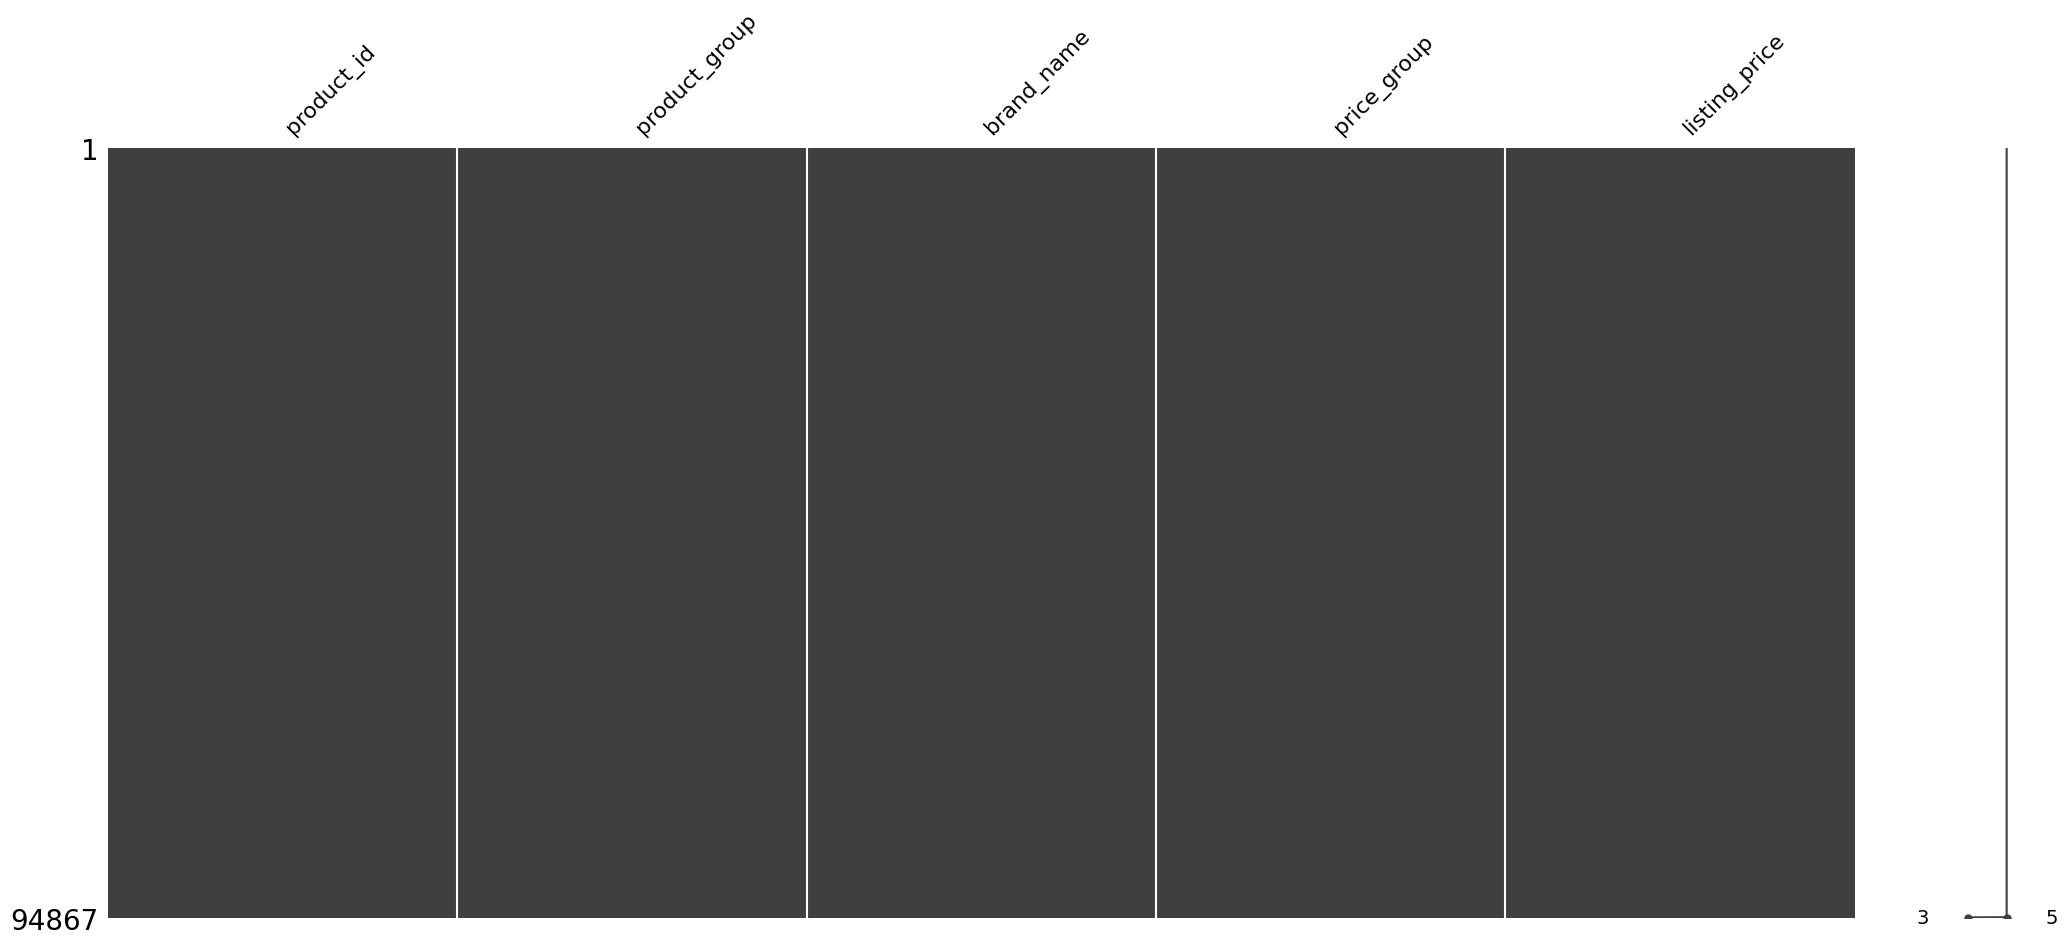

In [ ]:
msno.matrix(product)

In [18]:
#Thay th·∫ø Na v√†o c√°c gi√° tr·ªã c√≤n tr·ªëng
product.fillna({
    'price_group': 'Unknown',     # nh√≥m gi√° b·ªã thi·∫øu
}, inplace=True)
# lo·∫°i b·ªè c√°c d√≤ng c√≤n l·∫°i c√≥ nhi·ªÅu NA
product.dropna(inplace=True)

#V·ªõi gi√° tr·ªã s·ªë, ta d√πng 0 v√¨ c√≥ th·ªÉ hi·ªÉu l√† ‚Äúch∆∞a c√≥ d·ªØ li·ªáu‚Äù
product.fillna({
    'listing_price': 0,     # gi√° ni√™m y·∫øt ch∆∞a c√≥ ‚Üí 0
}, inplace=True)

In [19]:
#check null after handling
product.isnull().sum()

product_id       0
product_group    0
brand_name       0
price_group      0
listing_price    0
dtype: int64

### DROP DUPLICATE

In [20]:
# Danh s√°ch c√°c b·∫£ng c·∫ßn x·ª≠ l√Ω
datasets = {
    'product': product,
    'cogs': cogs,
    'channel': channel,
    'sales_data': sales_data
}

for name, df in datasets.items():
    print(f"\n Ki·ªÉm tra b·∫£ng: {name}")
    before = len(df)
    dup_count = df.duplicated().sum()  # s·ªë l∆∞·ª£ng d√≤ng tr√πng ho√†n to√†n

    if dup_count > 0:
        print(f" Ph√°t hi·ªán {dup_count} d√≤ng tr√πng l·∫∑p ho√†n to√†n.")
        df.drop_duplicates(inplace=True, keep='first')  # x√≥a tr√πng to√†n b·ªô c·ªôt
        after = len(df)
        print(f"ƒê√£ xo√° {before - after} d√≤ng tr√πng l·∫∑p. C√≤n l·∫°i: {after} d√≤ng.")
    else:
        print(f"Kh√¥ng c√≥ d√≤ng tr√πng l·∫∑p trong b·∫£ng {name}.")



 Ki·ªÉm tra b·∫£ng: product
Kh√¥ng c√≥ d√≤ng tr√πng l·∫∑p trong b·∫£ng product.

 Ki·ªÉm tra b·∫£ng: cogs
 Ph√°t hi·ªán 266756 d√≤ng tr√πng l·∫∑p ho√†n to√†n.
ƒê√£ xo√° 266756 d√≤ng tr√πng l·∫∑p. C√≤n l·∫°i: 255919 d√≤ng.

 Ki·ªÉm tra b·∫£ng: channel
 Ph√°t hi·ªán 238 d√≤ng tr√πng l·∫∑p ho√†n to√†n.
ƒê√£ xo√° 238 d√≤ng tr√πng l·∫∑p. C√≤n l·∫°i: 3167 d√≤ng.

 Ki·ªÉm tra b·∫£ng: sales_data
 Ph√°t hi·ªán 22059 d√≤ng tr√πng l·∫∑p ho√†n to√†n.
ƒê√£ xo√° 22059 d√≤ng tr√πng l·∫∑p. C√≤n l·∫°i: 783475 d√≤ng.


In [21]:
print("B·∫£ng cogs \n")
print(cogs.head())
print("\n b·∫£ng product")
print(product.head())
print("\n b·∫£ng channel")
print(channel.head())
print("\n b·∫£ng sales")
print(sales_data.head())

B·∫£ng cogs 

                              product_id  amount
0  904de55fb0ca414cb86b2e466c9d74c1OOO00   50000
2  9e8ecc5d2b104d609e3b53c4724bc96aCAM39  479400
3  9225ed5b408343be98a4dc63d4027a26CAM40  479400
4  d1410b40bb004d1f9b2c2619d2c933f6CAM41  479400
5  81f0a5c55afa4407897b0890f5cc904fCAM42  479400

 b·∫£ng product
                              product_id product_group brand_name price_group  \
0  80e1107e5bf74598baffea3a7b6073c5DEN38           SAN     Brand1     200<300   
1  c8223e6133a64491a006dc0f95c2bfd9DEN39           SAN     Brand1     200<300   
2  bec30e131ee04e49a4c87bc56f135b13DEN40           SAN     Brand1     200<300   
3  3f4e265b0ac740e9b9edfd23e0ba1ca5DEN41           SAN     Brand1     200<300   
4  53e6284597944ec787e002b631391210DEN42           SAN     Brand1     200<300   

   listing_price  
0       255273.0  
1       255273.0  
2       255273.0  
3       255273.0  
4       255273.0  

 b·∫£ng channel
   site_store region store_type urbanization b2b_b2c
0   

### DEAL WITH OUTLIERS

In [24]:
def handle_outliers(df, df_name, numeric_cols=None):
    """
    X·ª≠ l√Ω outlier nh·∫π:
    - Kh√¥ng lo·∫°i b·ªè d·ªØ li·ªáu nhi·ªÅu
    - Gi·ªõi h·∫°n b·∫±ng winsorize (theo percentile)
    - Kh√¥ng lo·∫°i n·∫øu ch·ªâ chi·∫øm < 1%
    """
    print(f"\nX·ª≠ l√Ω outlier nh·∫π cho b·∫£ng: {df_name}")
    df_clean = df.copy()

    if numeric_cols is None:
        numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

    for col in numeric_cols:
        before = len(df_clean)

        # Lo·∫°i gi√° tr·ªã √¢m (ƒë√£ l√†m tr∆∞·ªõc ƒë√≥, ch·ªâ ƒë·ªÅ ph√≤ng th√¥i)
        df_clean = df_clean[df_clean[col] >= 0]

        # T√≠nh ng∆∞·ª°ng d·ª±a theo percentile (nh·∫π h∆°n IQR)
        lower = df_clean[col].quantile(0.005)
        upper = df_clean[col].quantile(0.995)

        outliers = ((df_clean[col] < lower) | (df_clean[col] > upper)).sum()
        ratio = outliers / len(df_clean)

        if ratio > 0.02:  # n·∫øu >2% d·ªØ li·ªáu l√† outlier th√¨ ch·ªâ gi·ªõi h·∫°n
            df_clean[col] = np.clip(df_clean[col], lower, upper)
            action = "gi·ªõi h·∫°n gi√° tr·ªã (winsorize)"
        else:
            df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
            action = "lo·∫°i b·ªè nh·∫π"

        after = len(df_clean)
        print(f"{col}: {outliers} outlier ({action}), c√≤n l·∫°i {after}/{before} d√≤ng")

    print(f"Ho√†n t·∫•t x·ª≠ l√Ω nh·∫π cho {df_name}, c√≤n l·∫°i {len(df_clean)} d√≤ng.")
    return df_clean
# √Åp d·ª•ng cho t·ª´ng b·∫£ng
cogs_clean = handle_outliers(cogs, "COGS", numeric_cols=['amount'])
product_clean = handle_outliers(product, "PRODUCT", numeric_cols=['listing_price'])
channel_clean = handle_outliers(channel, "CHANNEL", numeric_cols=[])  # kh√¥ng c√≥ bi·∫øn s·ªë
sales_clean = handle_outliers(sales_data, "SALES", numeric_cols=['sold_quantity', 'cost_price', 'net_price'])

# L∆∞u file k·∫øt qu·∫£
cogs_clean.to_csv("Dataset/preprocess/COGS_clean.csv", index=False, encoding="utf-8-sig")
product_clean.to_csv("Dataset/preprocess/Product_clean.csv", index=False, encoding="utf-8-sig")
channel_clean.to_csv("Dataset/preprocess/Channel_clean.csv", index=False, encoding="utf-8-sig")
sales_clean.to_csv("Dataset/preprocess/Sales_clean.csv", index=False, encoding="utf-8-sig")

print("\nƒê√£ l∆∞u to√†n b·ªô c√°c b·∫£ng v√†o th∆∞ m·ª•c preprocess sau khi x·ª≠ l√Ω outlier.")


X·ª≠ l√Ω outlier nh·∫π cho b·∫£ng: COGS
amount: 2522 outlier (lo·∫°i b·ªè nh·∫π), c√≤n l·∫°i 253397/255919 d√≤ng
Ho√†n t·∫•t x·ª≠ l√Ω nh·∫π cho COGS, c√≤n l·∫°i 253397 d√≤ng.

X·ª≠ l√Ω outlier nh·∫π cho b·∫£ng: PRODUCT
listing_price: 532 outlier (lo·∫°i b·ªè nh·∫π), c√≤n l·∫°i 94308/94840 d√≤ng
Ho√†n t·∫•t x·ª≠ l√Ω nh·∫π cho PRODUCT, c√≤n l·∫°i 94308 d√≤ng.

X·ª≠ l√Ω outlier nh·∫π cho b·∫£ng: CHANNEL
Ho√†n t·∫•t x·ª≠ l√Ω nh·∫π cho CHANNEL, c√≤n l·∫°i 3167 d√≤ng.

X·ª≠ l√Ω outlier nh·∫π cho b·∫£ng: SALES
sold_quantity: 3450 outlier (lo·∫°i b·ªè nh·∫π), c√≤n l·∫°i 780025/783475 d√≤ng
cost_price: 7562 outlier (lo·∫°i b·ªè nh·∫π), c√≤n l·∫°i 772463/780025 d√≤ng
net_price: 7547 outlier (lo·∫°i b·ªè nh·∫π), c√≤n l·∫°i 764916/772463 d√≤ng
Ho√†n t·∫•t x·ª≠ l√Ω nh·∫π cho SALES, c√≤n l·∫°i 764916 d√≤ng.

ƒê√£ l∆∞u to√†n b·ªô c√°c b·∫£ng v√†o th∆∞ m·ª•c preprocess sau khi x·ª≠ l√Ω outlier.


------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

# T·ª™ KH√öC D∆Ø·ªöI N√ÄY T√îI X·ª¨ L√ç ƒê·∫∏P L·∫†I SAU NHE
CHECK XEM DATA SAU KHI PH√ÇN T√çCH V√Ä X·ª¨ L√ç MISSING VALUE V·ªöI OUTLIER OKE CHUA HOI

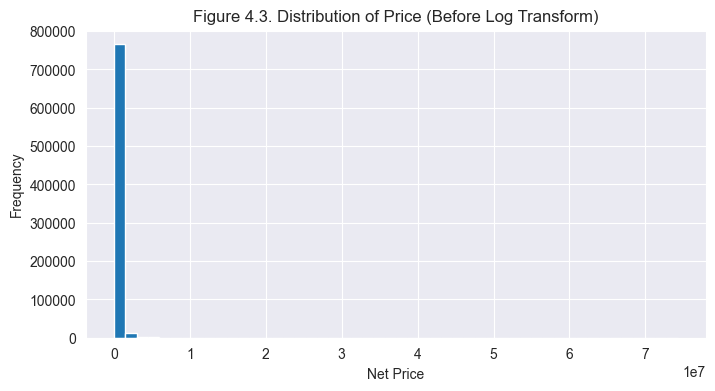

In [25]:
# V·∫Ω histogram ƒë·ªÉ xem ph√¢n b·ªë gi√°
df['net_price'].hist(bins=50, figsize=(8,4))
plt.title("Figure 4.3. Distribution of Price (Before Log Transform)")
plt.xlabel("Net Price")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df.shape

(783475, 10)

## Nh·∫≠n di·ªán c√°c outlier qua box plot v√† histogram

In [26]:
import matplotlib.pyplot as plt

# Ch·ªçn c√°c c·ªôt ƒë·ªãnh l∆∞·ª£ng quan tr·ªçng
num_cols = ['sold_quantity', 'net_price', 'listing_price', 'cost_price', 'revenue', 'profit', 'discount_rate']

plt.figure(figsize=(14, 8))
df[num_cols].boxplot()
plt.title("Ph√¢n b·ªë d·ªØ li·ªáu v√† Outlier c·ªßa c√°c bi·∫øn ƒë·ªãnh l∆∞·ª£ng")
plt.ylabel("Gi√° tr·ªã")
plt.xticks(rotation=30)
plt.show()


KeyError: "['listing_price', 'revenue', 'profit', 'discount_rate'] not in index"

<Figure size 1400x800 with 0 Axes>

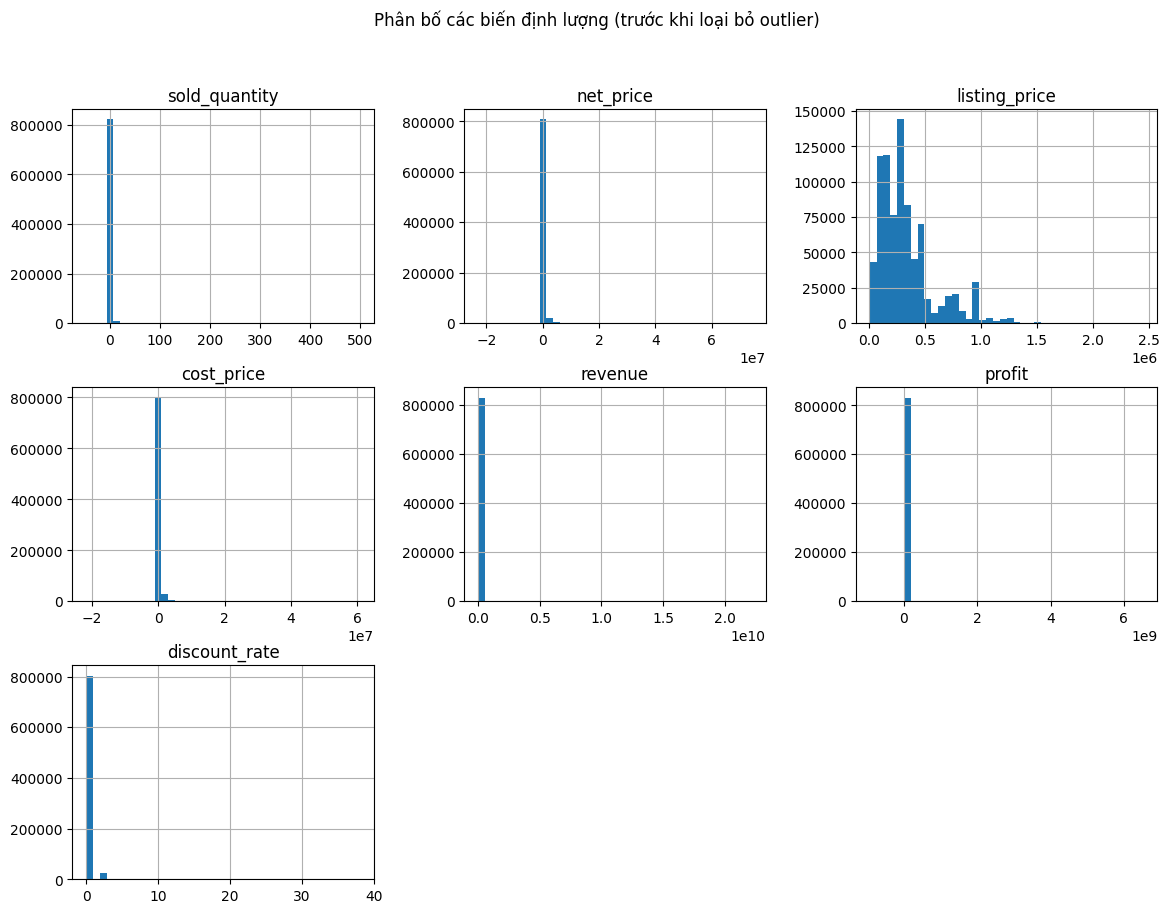

In [ ]:
df[num_cols].hist(figsize=(14,10), bins=40)
plt.suptitle("Ph√¢n b·ªë c√°c bi·∫øn ƒë·ªãnh l∆∞·ª£ng (tr∆∞·ªõc khi lo·∫°i b·ªè outlier)")
plt.show()


In [ ]:
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        before = len(df)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        after = len(df)
        print(f"{col}: {before - after} d√≤ng b·ªã lo·∫°i ({round((before - after)/before*100,2)}%)")
    return df


# √Åp d·ª•ng cho c√°c bi·∫øn ƒë·ªãnh l∆∞·ª£ng ch√≠nh
cols_iqr = ['sold_quantity', 'net_price', 'listing_price', 'revenue', 'profit']
df_clean = remove_outliers_iqr(df, cols_iqr)

sold_quantity: 144235 d√≤ng b·ªã lo·∫°i (17.34%)
net_price: 42999 d√≤ng b·ªã lo·∫°i (6.25%)
listing_price: 24038 d√≤ng b·ªã lo·∫°i (3.73%)
revenue: 14502 d√≤ng b·ªã lo·∫°i (2.34%)
profit: 1744 d√≤ng b·ªã lo·∫°i (0.29%)


In [ ]:
df_clean['discount_rate'] = df_clean['discount_rate'].clip(lower=0, upper=1)
df_clean['gross_margin'] = df_clean['gross_margin'].clip(lower=-0.2, upper=1)

In [ ]:
print("Sau khi x·ª≠ l√Ω:", df_clean.shape)
df_clean.describe()

Sau khi x·ª≠ l√Ω: (604438, 23)


month           week           site  sold_quantity  \
count  6.044380e+05  604438.000000  604438.000000       604438.0   
mean   2.022311e+06  202252.741960    1286.689482            1.0   
std    4.595540e+02      44.056197     211.158361            0.0   
min    2.022001e+06  202153.000000    1100.000000            1.0   
25%    2.022005e+06  202218.000000    1121.000000            1.0   
50%    2.022009e+06  202236.000000    1200.000000            1.0   
75%    2.023001e+06  202303.000000    1505.000000            1.0   
max    2.023007e+06  202352.000000    2001.000000            1.0   

          cost_price      net_price  listing_price      cost_std  \
count  604438.000000  604438.000000  604438.000000  6.044380e+05   
mean   184984.133311  259904.726523  262402.369441  1.888223e+05   
std     99580.175992  142966.642495  146208.891679  1.018146e+05   
min      4550.000000       0.000000    6500.000000  4.550000e+03   
25%    110160.000000  144000.000000  147273.000000  1.110667e+05   
50%    186938.000000  250000.000000  260182.000000  1.915333e+05   
75%    250364.000000  355000.000000  358364.000000  2.550000e+05   
max    699720.000000  692000.000000  736364.000000  1.239380e+06   

                year   week_in_year  month_in_year        revenue  \
count  604438.000000  604438.000000  604438.000000  604438.000000   
mean     2022.299816      22.760391       5.611644  259904.726523   
std         0.470948      15.126930       3.451957  142966.642495   
min      2021.000000       1.000000       1.000000       0.000000   
25%      2022.000000       9.000000       3.000000  144000.000000   
50%      2022.000000      22.000000       5.000000  250000.000000   
75%      2023.000000      34.000000       8.000000  355000.000000   
max      2023.000000      53.000000      12.000000  692000.000000   

              profit   gross_margin  discount_rate  
count  604438.000000  604438.000000  604438.000000  
mean    74920.593212       0.280930       0.050765  
std     49770.207525       0.087229       0.088340  
min    -88400.000000      -0.200000       0.000000  
25%     30720.000000       0.307636       0.000000  
50%     64000.000000       0.320000       0.000579  
75%    110328.000000       0.320000       0.066138  
max    229540.000000       0.511964       1.000000

In [ ]:
df.sample(3)

month    week  site  sold_quantity  cost_price  net_price  \
401659  2023005  202320  1512              1       70720     104000   
617217  2022008  202235  1604              1      201027     278000   
663997  2022009  202237  1800              4     2267292    3150872   

                                   product_id  listing_price price_group  \
401659  b1535a371c0f4f339c896446b5a99c29XNH37       102109.0     100<200   
617217  d78f8e015288485398648dfa43587e21CAM33       328909.0     300<600   
663997  a8012542810c4208a319d1e4dea10050XAM37       794291.0     600<900   

       product_group  ... region  store_type urbanization  year week_in_year  \
401659           DEP  ...   KVMT     ƒê·ªôc l·∫≠p    N·ªôi th√†nh  2023           20   
617217           SAN  ...   KVTN     ƒê·ªôc l·∫≠p    N·ªôi th√†nh  2022           35   
663997           GIA  ...   Kh√°c      Online         Kh√°c  2022           37   

       month_in_year     revenue     profit  gross_margin  discount_rate  
401659             5    104000.0    33280.0      0.320000       0.000000  
617217             8    278000.0    76973.0      0.276881       0.154781  
663997             9  12603488.0  3534320.0      0.280424       0.000000  

[3 rows x 23 columns]

In [ ]:
df_clean.sample(3)

month    week  site  sold_quantity  cost_price  net_price  \
336996  2023004  202316  1209              1       57800      60000   
33621   2022001  202204  1229              1       65280      96000   
92740   2023001  202303  1521              1      278800     410000   

                                   product_id  listing_price price_group  \
336996  c49dc1f7f1db44a4a01f524b11458b7dXNH34        78545.0      70<100   
33621   2249df1ae1914e37928f0436a7c417dfXAM41       104073.0     100<200   
92740   d951cf31c8cc47409e77a5bf6bb8ca27DEN39       387818.0     300<600   

       product_group  ... region  store_type urbanization  year week_in_year  \
336996           DEP  ...   KVMB     ƒê·ªôc l·∫≠p    N·ªôi th√†nh  2023           16   
33621            DEP  ...   KVMB     ƒê·ªôc l·∫≠p    N·ªôi th√†nh  2022            4   
92740            SAN  ...   KVMT     ƒê·ªôc l·∫≠p    N·ªôi th√†nh  2023            3   

       month_in_year   revenue    profit  gross_margin  discount_rate  
336996             4   60000.0    2200.0      0.036667       0.236107  
33621              1   96000.0   30720.0      0.320000       0.077571  
92740              1  410000.0  131200.0      0.320000       0.000000  

[3 rows x 23 columns]

## Let's visualize the price points to understand the outliers

### Tr·ª±c quan h√≥a outlier theo khu v·ª±c (region) v√† gi√° b√°n (net_price)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12296\1181097810.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_12296\1181097810.py:7: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.boxplot(


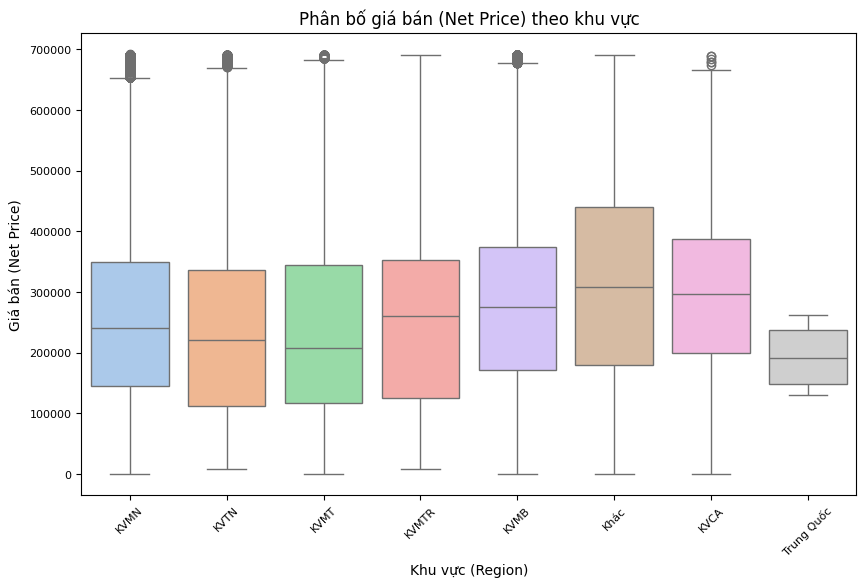

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-pastel')
plt.figure(figsize=(10,6))

sns.boxplot(
    data=df_clean,
    x='region',
    y='net_price',
    palette=sns.color_palette('pastel')
)

plt.title('Ph√¢n b·ªë gi√° b√°n (Net Price) theo khu v·ª±c', fontsize=12)
plt.xlabel('Khu v·ª±c (Region)', fontsize=10)
plt.ylabel('Gi√° b√°n (Net Price)', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.show()


### Ph√¢n b·ªë s·ªë l∆∞·ª£ng b√°n ra (sold_quantity):

C:\Users\Admin\AppData\Local\Temp\ipykernel_12296\2053609638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_12296\2053609638.py:2: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.boxplot(


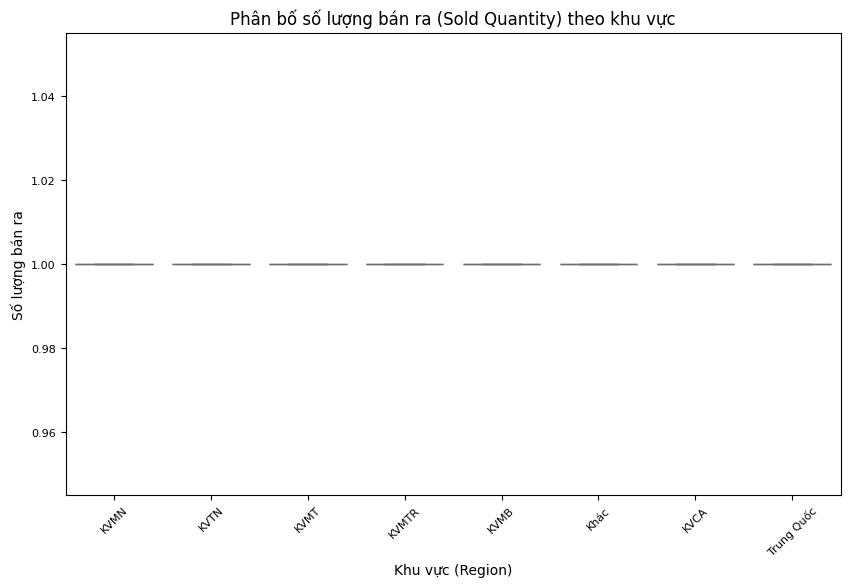

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_clean,
    x='region',
    y='sold_quantity',
    palette=sns.color_palette('pastel')
)
plt.title('Ph√¢n b·ªë s·ªë l∆∞·ª£ng b√°n ra (Sold Quantity) theo khu v·ª±c', fontsize=12)
plt.xlabel('Khu v·ª±c (Region)', fontsize=10)
plt.ylabel('S·ªë l∆∞·ª£ng b√°n ra', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

## Analysis Questions

Here, we try to gather all the possible analysis questions and insights into the data we want. I have gathered a few questions, whose answers I‚Äôd like to know. I have broadly classified the questions into 4 categories.

I. Ph√¢n t√≠ch m√¥ t·∫£ (Descriptive Analysis)

1.1. Gi√° b√°n trung b√¨nh (net_price) v√† gi√° ni√™m y·∫øt (listing_price) c·ªßa c√°c s·∫£n ph·∫©m.

1.2. M·ª©c chi·∫øt kh·∫•u trung b√¨nh (discount_rate) theo nh√≥m s·∫£n ph·∫©m.

1.4. S·ªë l∆∞·ª£ng s·∫£n ph·∫©m b√°n ƒë∆∞·ª£c trung b√¨nh (sold_quantity) tr√™n m·ªói SKU.

II. Ph√¢n t√≠ch theo lo·∫°i s·∫£n ph·∫©m (SKU/Product Analysis)

2.1. Top 10 nh√≥m s·∫£n ph·∫©m (product_group) c√≥ doanh thu cao nh·∫•t.

2.2. So s√°nh l·ª£i nhu·∫≠n trung b√¨nh (profit) gi·ªØa c√°c th∆∞∆°ng hi·ªáu (brand_name).

2.3. Ph√¢n b·ªë gi√° ni√™m y·∫øt (listing_price) theo nh√≥m gi√° (price_group).



III. Ph√¢n t√≠ch theo th·ªùi gian (Time Series Analysis)

3.1. Xu h∆∞·ªõng doanh thu (revenue) theo th·ªùi gian (tu·∫ßn/th√°ng).

3.2. M·ª©c chi·∫øt kh·∫•u trung b√¨nh thay ƒë·ªïi nh∆∞ th·∫ø n√†o qua c√°c th√°ng.

3.3. Doanh s·ªë b√°n trung b√¨nh (sold_quantity) theo m√πa ho·∫∑c qu√Ω.


IV. Ph√¢n t√≠ch theo khu v·ª±c (Regional Analysis)

4.1. Top khu v·ª±c (region) c√≥ doanh thu cao nh·∫•t.

4.2. So s√°nh l·ª£i nhu·∫≠n trung b√¨nh (profit) gi·ªØa c√°c khu v·ª±c.

4.3. ·∫¢nh h∆∞·ªüng c·ªßa lo·∫°i c·ª≠a h√†ng (store_type) ƒë·∫øn doanh s·ªë.



## Descriptive Analysis

1.1. Gi√° b√°n trung b√¨nh (net_price) v√† gi√° ni√™m y·∫øt (listing_price) c·ªßa c√°c s·∫£n ph·∫©m

In [ ]:
#Calculate the mean of the ‚Äòprice‚Äô column
average_net_price = df['net_price'].mean()
print(f'Average Net Price: ${average_net_price:.2f}')

average_listing_price = df['listing_price'].mean()
print(f'Average Listing Price: ${average_listing_price:.2f}')


Average Net Price: $399331.25
Average Listing Price: $332553.57


In [ ]:
df.groupby('product_group')['discount_rate'].mean().sort_values(ascending=False)


In [ ]:
df['gross_margin'].mean()

In [ ]:
df.groupby('product_id')['sold_quantity'].mean().head(10)

In [ ]:
# V·∫º BI·ªÇU ƒê·ªí SCATTER PLOT
sns.scatterplot(x='net_price', y='sold_quantity', data=sales_data, alpha=0.6)
plt.title("Figure 4.11. Relationship between Price and Sold Quantity")
plt.xlabel("Net Price")
plt.ylabel("Sold Quantity")
plt.show()


Ph√¢n ph·ªëi c·ªßa c√°c bi·∫øn ch√≠nh (Distribution of Key Features)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sales_data['sold_quantity'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title("Figure 4.8. Distribution of Sold Quantity")
plt.xlabel("S·ªë l∆∞·ª£ng b√°n (sold_quantity)")
plt.ylabel("T·∫ßn su·∫•t xu·∫•t hi·ªán")
plt.show()


## Ph√¢n t√≠ch theo lo·∫°i s·∫£n ph·∫©m

In [ ]:
# 2.1 Top 10 nh√≥m s·∫£n ph·∫©m doanh thu cao nh·∫•t
df.groupby('product_group')['revenue'].sum().sort_values(ascending=False).head(10)

# 2.2 L·ª£i nhu·∫≠n trung b√¨nh theo th∆∞∆°ng hi·ªáu
df.groupby('brand_name')['profit'].mean().sort_values(ascending=False).head(10)

# 2.3 Ph√¢n b·ªë gi√° ni√™m y·∫øt theo nh√≥m gi√°
df.groupby('price_group')['listing_price'].mean().sort_values()

# 2.4 Chi·∫øt kh·∫•u trung b√¨nh theo nh√≥m s·∫£n ph·∫©m
df.groupby('product_group')['discount_rate'].mean().sort_values(ascending=False)


## Ph√¢n t√≠ch theo th·ªùi gian

In [ ]:
# 3.1 Xu h∆∞·ªõng doanh thu theo th√°ng
df.groupby('month')['revenue'].sum().plot(kind='line', title='Doanh thu theo th√°ng')

# 3.2 Chi·∫øt kh·∫•u trung b√¨nh theo th√°ng
df.groupby('month')['discount_rate'].mean().plot(kind='line', title='Chi·∫øt kh·∫•u trung b√¨nh theo th√°ng')

# 3.3 S·ªë l∆∞·ª£ng b√°n trung b√¨nh theo th√°ng
df.groupby('month')['sold_quantity'].mean()

# 3.4 So s√°nh gi√° trung b√¨nh gi·ªØa c√°c th√°ng
df.groupby('month')['net_price'].mean()


## Ph√¢n t√≠ch theo khu v·ª±c

In [ ]:
# 4.1 Top khu v·ª±c doanh thu cao nh·∫•t
df.groupby('region')['revenue'].sum().sort_values(ascending=False).head(10)

# 4.2 L·ª£i nhu·∫≠n trung b√¨nh theo khu v·ª±c
df.groupby('region')['profit'].mean().sort_values(ascending=False)

# 4.3 Doanh s·ªë trung b√¨nh theo lo·∫°i c·ª≠a h√†ng
df.groupby('store_type')['sold_quantity'].mean()

# 4.4 So s√°nh B2B vs B2C
df.groupby('b2b_b2c')[['revenue', 'discount_rate']].mean()


üîπ B∆∞·ªõc 2 ‚Äì √Åp d·ª•ng Log Transformation

In [ ]:
import numpy as np

sales_data['log_sold_quantity'] = np.log1p(sales_data['sold_quantity'])
sns.histplot(sales_data['log_sold_quantity'], bins=40, color='orange')
plt.title("Figure 4.9. Distribution after Log Transformation")
plt.xlabel("log(1 + sold_quantity)")
plt.ylabel("Frequency")
plt.show()


B∆∞·ªõc 3 ‚Äì T∆∞∆°ng quan gi·ªØa c√°c bi·∫øn (Correlation Analysis)
B∆∞·ªõc 4 - Ph√¢n t√≠ch m·ªëi quan h·ªá gi·ªØa Gi√° v√† Doanh s·ªë (Price vs Sales)
B∆∞·ªõc 5 ‚Äì S·∫£n ph·∫©m b√°n ch·∫°y nh·∫•t (Top Selling Products)
B∆∞·ªõc 6 ‚Äì Ph√¢n t√≠ch doanh s·ªë theo khu v·ª±c (Regional Sales Analysis)
B∆∞·ªõc 7 ‚Äì Doanh s·ªë theo k√™nh b√°n h√†ng (Channel Analysis)
B∆∞·ªõc 8 ‚Äì Ph√¢n t√≠ch xu h∆∞·ªõng theo th·ªùi gian (Time Series Trends)

In [ ]:
3
corr = sales_data[['sold_quantity', 'net_price', 'cost_price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Figure 4.10. Correlation Matrix between Key Variables")
plt.show()




plt.figure(figsize=(10,6))
sns.heatmap(merged_df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Figure 4.8. Correlation Matrix of Numeric Variables")
plt.show()


In [ ]:
5
top_products = sales_data.groupby('product_id')['sold_quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='teal', figsize=(10,4))
plt.title("Figure 4.12. Top 10 Best-Selling Products")
plt.ylabel("Total Quantity Sold")
plt.show()


In [ ]:
6
region_sales = sales_data.groupby('branch_id')['sold_quantity'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', color='slateblue', figsize=(10,4))
plt.title("Figure 4.13. Total Sales Quantity by Branch/Region")
plt.ylabel("Total Sold Quantity")
plt.show()


In [ ]:
7
channel_sales = sales_data.groupby('channel_id')['sold_quantity'].sum().sort_values(ascending=False)
sns.barplot(x=channel_sales.index, y=channel_sales.values, palette='Set2')
plt.title("Figure 4.14. Total Sales by Channel Type")
plt.ylabel("Quantity Sold")
plt.xlabel("Channel ID")
plt.show()


In [ ]:
8
weekly_sales = sales_data.groupby('week')['sold_quantity'].sum()
plt.figure(figsize=(12,5))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o', color='tomato')
plt.title("Figure 4.15. Weekly Sales Trend (2022‚Äì2023)")
plt.xlabel("Week")
plt.ylabel("Total Sold Quantity")
plt.grid(True)
plt.show()


Descriptive data
1.1 Doanh thu trung b√¨nh theo th√°ng l√† bao nhi√™u?
‚Üí (Tr·∫£ l·ªùi b·∫±ng bi·ªÉu ƒë·ªì ƒë∆∞·ªùng th·ªÉ hi·ªán xu h∆∞·ªõng doanh thu trung b√¨nh h√†ng th√°ng.)

1.2 Gi√° b√°n trung b√¨nh c·ªßa c√°c s·∫£n ph·∫©m l√† bao nhi√™u, v√† m·ª©c gi√° n√†y kh√°c nhau nh∆∞ th·∫ø n√†o gi·ªØa c√°c nh√≥m s·∫£n ph·∫©m (product_group)?
‚Üí (Tr·∫£ l·ªùi b·∫±ng boxplot ho·∫∑c bar chart ph√¢n nh√≥m theo product_group.)

1.3 T·ªïng doanh thu c·ªßa t·ª´ng khu v·ª±c (region) chi·∫øm t·ª∑ tr·ªçng bao nhi√™u trong t·ªïng doanh thu to√†n h·ªá th·ªëng?
‚Üí (Tr·∫£ l·ªùi b·∫±ng bi·ªÉu ƒë·ªì tr√≤n Pie Chart th·ªÉ hi·ªán ph·∫ßn trƒÉm doanh thu theo khu v·ª±c.)

In [ ]:
# 1. Doanh thu trung b√¨nh theo th√°ng
avg_month_sales = merged_df.groupby('YearMonth')['total_sales'].mean()
avg_month_sales.plot(kind='line', figsize=(8,4))
plt.title("Figure 4.9. Average Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Average Sales")
plt.show()

# 2. T·ªïng doanh thu theo khu v·ª±c
region_sales = merged_df.groupby('region')['total_sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', figsize=(8,4))
plt.title("Figure 4.10. Total Sales by Region")
plt.ylabel("Total Sales")
plt.show()

# 3. Ph√¢n b·ªë gi√° b√°n theo nh√≥m s·∫£n ph·∫©m
sns.boxplot(x='product_group', y='net_price', data=merged_df)
plt.title("Figure 4.11. Price Distribution by Product Group")
plt.show()


Ph√¢n t√≠ch theo Th·ªùi gian (Time Series)
2.1 Doanh thu h√†ng tu·∫ßn c√≥ xu h∆∞·ªõng tƒÉng hay gi·∫£m trong giai ƒëo·∫°n 2022‚Äì2023?
‚Üí (V·∫Ω bi·ªÉu ƒë·ªì ƒë∆∞·ªùng th·ªÉ hi·ªán bi·∫øn ƒë·ªông t·ªïng doanh thu theo tu·∫ßn ho·∫∑c theo th√°ng.)

2.2 M·ª©c tƒÉng tr∆∞·ªüng doanh thu gi·ªØa c√°c tu·∫ßn nh∆∞ th·∫ø n√†o, c√≥ tu·∫ßn n√†o tƒÉng ƒë·ªôt bi·∫øn ho·∫∑c gi·∫£m m·∫°nh kh√¥ng?
‚Üí (V·∫Ω bi·ªÉu ƒë·ªì ƒë∆∞·ªùng th·ªÉ hi·ªán ph·∫ßn trƒÉm tƒÉng tr∆∞·ªüng tu·∫ßn k·∫ø ti·∫øp.)

2.3 C√≥ d·∫•u hi·ªáu m√πa v·ª• (seasonal trend) trong ho·∫°t ƒë·ªông b√°n h√†ng kh√¥ng? V√≠ d·ª•: doanh thu tƒÉng m·∫°nh ·ªü m√πa l·ªÖ, T·∫øt, ho·∫∑c gi·∫£m ·ªü th·ªùi ƒëi·ªÉm th·∫•p ƒëi·ªÉm trong nƒÉm.
‚Üí (V·∫Ω bi·ªÉu ƒë·ªì Seasonal Decomposition ho·∫∑c line plot nh√≥m theo th√°ng.)

In [ ]:
# 1. Xu h∆∞·ªõng doanh thu theo tu·∫ßn
weekly_sales = merged_df.groupby('YearWeek')['total_sales'].sum()
weekly_sales.plot(figsize=(8,4))
plt.title("Figure 4.12. Weekly Sales Trend")
plt.xlabel("Week")
plt.ylabel("Total Sales")
plt.show()

# 2. TƒÉng tr∆∞·ªüng doanh thu tu·∫ßn k·∫ø ti·∫øp
merged_df['weekly_growth'] = merged_df['total_sales'].pct_change()
merged_df[['YearWeek','weekly_growth']].dropna().plot(x='YearWeek', y='weekly_growth', figsize=(8,4))
plt.title("Figure 4.13. Weekly Sales Growth (%)")
plt.ylabel("Growth rate")
plt.show()


Ph√¢n t√≠ch theo S·∫£n ph·∫©m / SKU
.1 Nh·ªØng s·∫£n ph·∫©m n√†o (theo m√£ SKU) c√≥ doanh s·ªë b√°n ra cao nh·∫•t trong giai ƒëo·∫°n nghi√™n c·ª©u?
‚Üí (V·∫Ω bar chart Top 10 s·∫£n ph·∫©m b√°n ch·∫°y nh·∫•t.)

3.2 Nh√≥m s·∫£n ph·∫©m n√†o (gi√†y, d√©p, t√∫i x√°ch, ph·ª• ki·ªán, v.v.) mang l·∫°i doanh thu trung b√¨nh cao nh·∫•t?
‚Üí (V·∫Ω bar chart th·ªÉ hi·ªán doanh thu trung b√¨nh theo nh√≥m s·∫£n ph·∫©m.)

3.3 T·ªìn kho trung b√¨nh c·ªßa c√°c nh√≥m s·∫£n ph·∫©m c√≥ s·ª± ch√™nh l·ªách ƒë√°ng k·ªÉ kh√¥ng, nh√≥m n√†o t·ªìn kho cao nh·∫•t?
‚Üí (V·∫Ω bar chart th·ªÉ hi·ªán s·ªë l∆∞·ª£ng t·ªìn kho trung b√¨nh theo product_group.)

In [ ]:
# 1. Top 10 s·∫£n ph·∫©m b√°n ch·∫°y
top_sku = merged_df.groupby('product_id')['sold_quantity'].sum().nlargest(10)
top_sku.plot(kind='bar', figsize=(8,4))
plt.title("Figure 4.14. Top 10 Best-Selling SKUs")
plt.ylabel("Quantity Sold")
plt.show()

# 2. So s√°nh gi√° trung b√¨nh gi·ªØa nh√≥m s·∫£n ph·∫©m
sns.barplot(x='product_group', y='net_price', data=merged_df)
plt.title("Figure 4.15. Average Price by Product Group")
plt.show()

# 3. T·ªìn kho trung b√¨nh theo nh√≥m h√†ng
inventory_avg = merged_df.groupby('product_group')['quantity'].mean()
inventory_avg.plot(kind='bar', figsize=(8,4))
plt.title("Figure 4.16. Average Inventory Quantity by Product Group")
plt.show()


Ph√¢n t√≠ch theo Khu v·ª±c (Regional Analysis)
4.1 Khu v·ª±c n√†o c√≥ t·ªïng doanh thu cao nh·∫•t v√† th·∫•p nh·∫•t?
‚Üí (V·∫Ω bar chart th·ªÉ hi·ªán t·ªïng doanh thu theo khu v·ª±c.)

4.2 T·ªìn kho trung b√¨nh gi·ªØa c√°c khu v·ª±c kh√°c nhau nh∆∞ th·∫ø n√†o?
‚Üí (V·∫Ω boxplot th·ªÉ hi·ªán ph√¢n b·ªë t·ªìn kho theo khu v·ª±c.)

4.3 Doanh thu gi·ªØa c√°c khu v·ª±c c√≥ t∆∞∆°ng quan v·ªõi m·ª©c ƒë·ªô ƒë√¥ th·ªã h√≥a (urbanization) kh√¥ng?
‚Üí (C√≥ th·ªÉ s·ª≠ d·ª•ng scatter plot ho·∫∑c heatmap ƒë·ªÉ th·ªÉ hi·ªán m·ªëi li√™n h·ªá gi·ªØa urbanization v√† t·ªïng doanh thu.

In [ ]:
# 1. Doanh thu theo v√πng v√† th√°ng
pivot_region = pd.pivot_table(merged_df, values='total_sales', index='region', columns='YearMonth', aggfunc='sum')
sns.heatmap(pivot_region, cmap="YlGnBu")
plt.title("Figure 4.17. Heatmap: Sales by Region and Month")
plt.show()

# 2. Trung b√¨nh t·ªìn kho theo v√πng
sns.boxplot(x='region', y='quantity', data=merged_df)
plt.title("Figure 4.18. Inventory Distribution by Region")
plt.show()

# 3. T·ª∑ tr·ªçng doanh thu theo v√πng
region_ratio = merged_df.groupby('region')['total_sales'].sum()
region_ratio.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Figure 4.19. Sales Share by Region")
plt.ylabel("")
plt.show()
